In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [84]:
df = pd.read_csv('../data/amazon_co-ecommerce_sample.csv')
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [85]:
# keeping given columns
df_new = df[['product_name', 'average_review_rating', 'amazon_category_and_sub_category', 'number_of_reviews', 'customers_who_bought_this_item_also_bought', 'items_customers_buy_after_viewing_this_item']]
df_new['customers_who_bought_this_item_also_bought'][0]

'http://www.amazon.co.uk/Hornby-R8150-Catalogue-2015/dp/B00S9SUUBE | http://www.amazon.co.uk/Hornby-Book-Model-Railways-Edition/dp/1844860957 | http://www.amazon.co.uk/Hornby-Book-Scenic-Railway-Modelling/dp/1844861120 | http://www.amazon.co.uk/Peco-60-Plans-Book/dp/B002QVL16I | http://www.amazon.co.uk/Hornby-Gloucester | http://www.amazon.co.uk/Airfix-5014429781902'

In [86]:
df_new['average_review_rating'] = df_new['average_review_rating'].apply(lambda x: float(x.split(' ')[0]) if isinstance(x, str) else x)

/tmp/ipykernel_3284/1497624181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['average_review_rating'] = df_new['average_review_rating'].apply(lambda x: float(x.split(' ')[0]) if isinstance(x, str) else x)


In [87]:
# transform customers_who_bought_this_item_also_bought by split by | and then split by / and select at index 3 and then use > to join
df_new['customers_who_bought_this_item_also_bought'] = df_new['customers_who_bought_this_item_also_bought'].apply(lambda x: ' > '.join([i.split('/')[3] for i in x.split('|')]) if isinstance(x, str) else x)
# transform customers_who_bought_this_item_also_bought by split by | and then split by / and select at index 3 and then use > to join
df_new['items_customers_buy_after_viewing_this_item'] = df_new['items_customers_buy_after_viewing_this_item'].apply(lambda x: ' > '.join([i.split('/')[3] for i in x.split('|')]) if isinstance(x, str) else x)

/tmp/ipykernel_3284/3457672491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['customers_who_bought_this_item_also_bought'] = df_new['customers_who_bought_this_item_also_bought'].apply(lambda x: ' > '.join([i.split('/')[3] for i in x.split('|')]) if isinstance(x, str) else x)
/tmp/ipykernel_3284/3457672491.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['items_customers_buy_after_viewing_this_item'] = df_new['items_customers_buy_after_viewing_this_item'].apply(lambda x: ' > '.join([i.

In [88]:
df_new['number_of_reviews'] = df_new['number_of_reviews'].apply(lambda x: int(x.replace(',', '')) if isinstance(x, str) else x)

/tmp/ipykernel_3284/2367280075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['number_of_reviews'] = df_new['number_of_reviews'].apply(lambda x: int(x.replace(',', '')) if isinstance(x, str) else x)


In [89]:
# remove the rows which have empty values in any cell
df_new = df_new.dropna()
df_new.head()

,product_name,average_review_rating,amazon_category_and_sub_category,number_of_reviews,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item
0,Hornby 2014 Catalogue,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,15.0,Hornby-R8150-Catalogue-2015 > Hornby-Book-Mode...,Hornby-R8150-Catalogue-2015 > Hornby-Book-Mode...
1,FunkyBuys® Large Christmas Holiday Express Fes...,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,2.0,Christmas-Holiday-Express-Festive-Train-Set-To...,Christmas-Holiday-Express-Festive-Train-Set-To...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,17.0,Classic-Train-Lights-Battery-Operated > Train-...,Train-With-Tracks-Battery-Operated-x > Classic...
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,3.0,Hornby-R6367-RailRoad-Gauge-Rolling > Hornby-R...,Hornby-R2672-RailRoad-Caledonian > Hornby-R30...
5,20pcs Model Garden Light Double Heads Lamppost...,5.0,Hobbies > Model Trains & Railway Sets > Lighti...,2.0,Single-Head-Garden-Lights-Lamppost-Layout > do...,Single-Head-Garden-Lights-Lamppost-Layout > Mo...


In [90]:
# create a csv file named amazon_co-ecommerce_sample_cleaned.csv from df_new
df_new.to_csv('../data/amazon_co-ecommerce_sample_cleaned.csv', index=False)

In [91]:
df_new = pd.read_csv('../data/amazon_co-ecommerce_sample_cleaned.csv')

In [92]:
df_new.head()

,product_name,average_review_rating,amazon_category_and_sub_category,number_of_reviews,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item
0,Hornby 2014 Catalogue,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,15.0,Hornby-R8150-Catalogue-2015 > Hornby-Book-Mode...,Hornby-R8150-Catalogue-2015 > Hornby-Book-Mode...
1,FunkyBuys® Large Christmas Holiday Express Fes...,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,2.0,Christmas-Holiday-Express-Festive-Train-Set-To...,Christmas-Holiday-Express-Festive-Train-Set-To...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,17.0,Classic-Train-Lights-Battery-Operated > Train-...,Train-With-Tracks-Battery-Operated-x > Classic...
3,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,3.0,Hornby-R6367-RailRoad-Gauge-Rolling > Hornby-R...,Hornby-R2672-RailRoad-Caledonian > Hornby-R30...
4,20pcs Model Garden Light Double Heads Lamppost...,5.0,Hobbies > Model Trains & Railway Sets > Lighti...,2.0,Single-Head-Garden-Lights-Lamppost-Layout > do...,Single-Head-Garden-Lights-Lamppost-Layout > Mo...


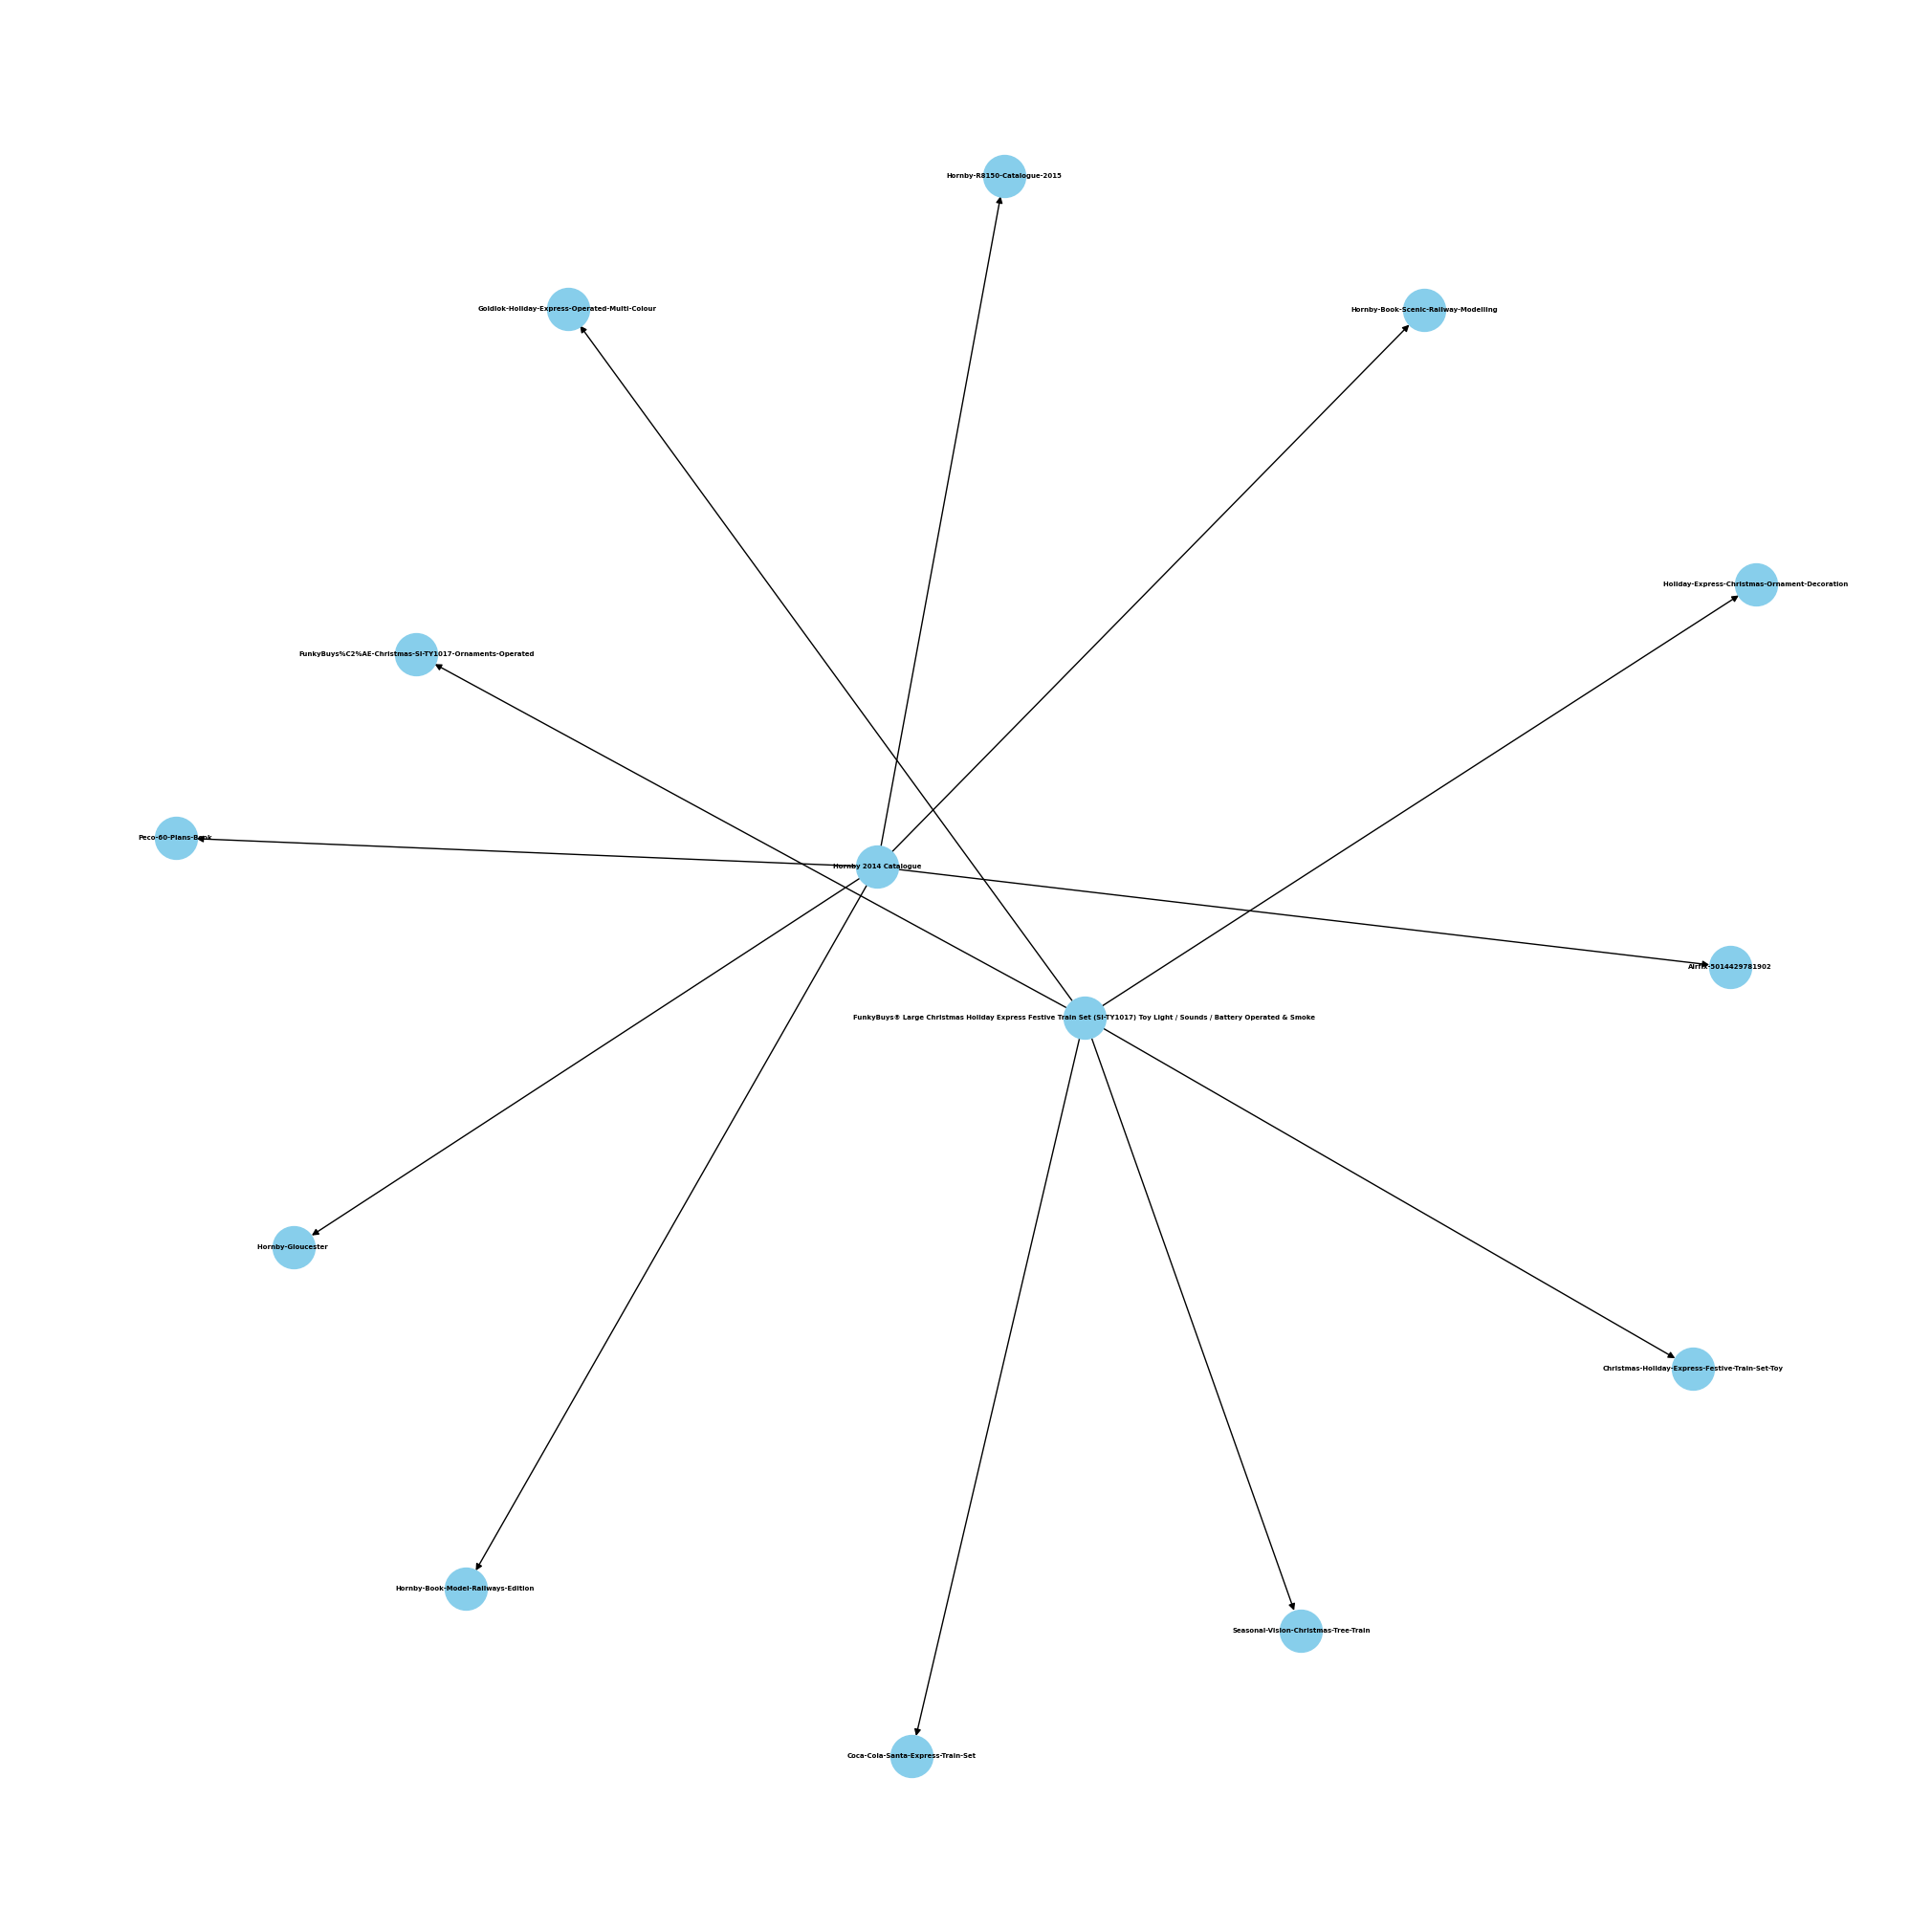

In [93]:
# Use pyspark to make graph of product_name as parent node and customers_who_bought_this_item_also_bought(separated by '>') as child node, directed graph

import networkx as nx
import matplotlib.pyplot as plt

# Take first 100 rows
df_new_2 = df_new.head(2)

G = nx.DiGraph()
for i in range(df_new_2.shape[0]):
    if isinstance(df_new_2['customers_who_bought_this_item_also_bought'][i], str):
        # split by > and then add edge
        for j in df_new_2['customers_who_bought_this_item_also_bought'][i].split(' > '):
            # weighted_rating = (v/(v+m) * R) + (m/(m+v) * C)
            # R is the average rating of the product (from 0 to 5).
            # v is the number of reviews for the product.
            # m is the minimum number of reviews required to be listed (this could be a threshold you set based on your data).
            # C is the mean rating across the whole report.

            weight = 0
            if not np.isnan(df_new_2['average_review_rating'][i]) and not np.isnan(df_new_2['number_of_reviews'][i]):
                v = df_new_2['number_of_reviews'][i]
                R = df_new_2['average_review_rating'][i]
                m = df_new_2['number_of_reviews'].mean()
                C = df_new_2['average_review_rating'].mean()
                weight = (v/(v+m) * R) + (m/(m+v) * C)
            G.add_edge(df_new_2['product_name'][i], j, weight=weight)
# Draw graph
plt.figure(figsize=(20, 20))
nx.draw(G, with_labels=True, node_size=1000, node_color='skyblue', font_size=5, font_weight='bold')
plt.show()


In [94]:

# # Do complete analysis of the graph
# # Degree of the graph
# print('Degree of the graph:', G.degree)
# # Clustering coefficient
# print('Clustering coefficient:', nx.clustering(G))
# # Average clustering coefficient
# print('Average clustering coefficient:', nx.average_clustering(G))

# # Density of the graph
# print('Density of the graph:', nx.density(G))
# # number of connected components
# # print('number of connected components:', nx.number_connected_components(G))
# # average degree connectivity
# print('average degree connectivity:', nx.average_degree_connectivity(G))
# # average node connectivity
# print('average node connectivity:', nx.average_node_connectivity(G))
# # average nearest neighbors degree
# print('average nearest neighbors degree:', nx.average_neighbor_degree(G))
# # average shortest path length
# print('average shortest path length:', nx.average_shortest_path_length(G))

In [95]:
# Use networkx to find the most bought item
most_bought = nx.pagerank(G)
most_bought = sorted(most_bought.items(), key=lambda x: x[1], reverse=True)
most_bought[:5]

[('Hornby-R8150-Catalogue-2015', 0.07271765611165591),
 ('Hornby-Book-Model-Railways-Edition', 0.07271765611165591),
 ('Hornby-Book-Scenic-Railway-Modelling', 0.07271765611165591),
 ('Peco-60-Plans-Book', 0.07271765611165591),
 ('Hornby-Gloucester ', 0.07271765611165591)]

In [96]:
df_new.head()

,product_name,average_review_rating,amazon_category_and_sub_category,number_of_reviews,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item
0,Hornby 2014 Catalogue,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,15.0,Hornby-R8150-Catalogue-2015 > Hornby-Book-Mode...,Hornby-R8150-Catalogue-2015 > Hornby-Book-Mode...
1,FunkyBuys® Large Christmas Holiday Express Fes...,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,2.0,Christmas-Holiday-Express-Festive-Train-Set-To...,Christmas-Holiday-Express-Festive-Train-Set-To...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,17.0,Classic-Train-Lights-Battery-Operated > Train-...,Train-With-Tracks-Battery-Operated-x > Classic...
3,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,3.0,Hornby-R6367-RailRoad-Gauge-Rolling > Hornby-R...,Hornby-R2672-RailRoad-Caledonian > Hornby-R30...
4,20pcs Model Garden Light Double Heads Lamppost...,5.0,Hobbies > Model Trains & Railway Sets > Lighti...,2.0,Single-Head-Garden-Lights-Lamppost-Layout > do...,Single-Head-Garden-Lights-Lamppost-Layout > Mo...


In [97]:
# split customers_who_bought_this_item_also_bought and items_customers_buy_after_viewing_this_item on > and store in pandas dataframe
df_names_product = pd.DataFrame()
df_names_product['product_name'] = df_new['product_name']

In [98]:
df_names_product.head()
# create a dataframe with all the products in column customer_who_bought_this_item_also_bought after splitting by > and then stacking
df_customer_who_bought_this_item_also_bought = df_new['customers_who_bought_this_item_also_bought'].str.split(' > ', expand=True).stack().reset_index(level=1, drop=True).to_frame('customer_who_bought_this_item_also_bought')
# reset index
df_customer_who_bought_this_item_also_bought = df_customer_who_bought_this_item_also_bought.reset_index()
# create a dataframe with all the products in column items_customers_buy_after_viewing_this_item after splitting by > and then stacking
df_items_customers_buy_after_viewing_this_item = df_new['items_customers_buy_after_viewing_this_item'].str.split(' > ', expand=True).stack().reset_index(level=1, drop=True).to_frame('items_customers_buy_after_viewing_this_item')
# reset index
df_items_customers_buy_after_viewing_this_item = df_items_customers_buy_after_viewing_this_item.reset_index()

In [99]:
# Take all columns and create a new column in a new dataframe with all the unique products
df_all_products = pd.concat([df_customer_who_bought_this_item_also_bought, df_items_customers_buy_after_viewing_this_item], axis=1)
df_all_products = df_all_products.drop('index', axis=1)
df_all_products = df_all_products.drop_duplicates()
df_all_products = df_all_products.dropna()
df_all_products = df_all_products.reset_index()
df_all_products = df_all_products.drop('index', axis=1)

In [100]:
new_df_prods = pd.DataFrame()
all_unique_prods = set(df_all_products['customer_who_bought_this_item_also_bought']).union(set(df_all_products['items_customers_buy_after_viewing_this_item']))
new_df_prods['product_name'] = list(all_unique_prods)
# change product_name to all lower case
new_df_prods['product_name'] = new_df_prods['product_name'].apply(lambda x: x.lower())

new_df_prods.head()

,product_name
0,keel-toys-25-storm-husky
1,swimways-quality-spring-inflatable
2,boland-bv-74786-bol-orange-garland
3,german-king-tiger-ardennes-military
4,pampers-mega-plus-baby-dry-pants


In [101]:
# nltk.download('punkt')
# nltk.download('stopwords')

In [102]:
# make a new data frame using the entries of the data frame new_df_prods where each entry is 
# now separated by space and not by hyphen
df_new_prods = pd.DataFrame()
df_new_prods['product_name'] = new_df_prods['product_name'].apply(lambda x: x.replace('-', ' '))

df_new_prods.head()

,product_name
0,keel toys 25 storm husky
1,swimways quality spring inflatable
2,boland bv 74786 bol orange garland
3,german king tiger ardennes military
4,pampers mega plus baby dry pants


# using only string matching

In [103]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Tokenize user input
user_input = input("Enter your search query: ")
user_tokens = word_tokenize(user_input)

# Remove stopwords from user tokens
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in user_tokens if token.lower() not in stop_words]

# Perform text matching
matched_products = []
for product in df_new_prods['product_name']:
    product_tokens = word_tokenize(product)
    filtered_product_tokens = [token for token in product_tokens if token.lower() not in stop_words]
    if set(filtered_tokens).intersection(filtered_product_tokens):
        matched_products.append(product)

# Print matched product names
for product in matched_products:
    print(product)

how train your dragon 6019879
train flash electric sound europe
toys for play train round
point kids 100 piece railway train wooden
train your dragon bumper sticker
hornby digital train layout track
bigjigs rail bjt181 goods train
hornby gauge pennine express train
dinosaur train react tyrannosaurus 
piece jigsaw puzzle train standing
disney planes muir train transporter 
how train you dragon toothless
driver dans story train limited
carousel wooden train set piece
driver dans story train yourself
power train motorized set graffiti
toys for play milk train
bigjigs rail town country train
how train your dragon bewilderbeast
train stickers dover little activity
train dragon toothless cushion pillow
lego city 60050 train station
tactic o2588 mexican train
classic train carriages engine battery
action city london tube train
commuter train series yellow 3 car
series bullet train light model
train with tracks battery operated x
train your dragon sticker activity
classic train lights battery 

In [104]:
# make a new csv with top 5 rows of the amazon_co-ecommerce_sample_cleaned.csv
df_new.head().to_csv('../data/amazon_co-ecommerce_sample_cleaned_top_5.csv', index=False)
